[これ](http://kazufusa1484.hatenablog.com/entry/2017/06/21/133348)の続き。多変量の正規分布でギブスサンプリングしたい。

あるデータ点 $ \boldsymbol{x} = (x_1, x_2, ..., x_p) $とそのサイズ $ p $、平均 $ \boldsymbol\mu $、分散共分散行列 $ \boldsymbol\Sigma $ がある。確率密度関数 $ p(\boldsymbol{x} \mid \boldsymbol\Sigma, \boldsymbol\mu) $ は[以下となる](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)。

$$
p(\boldsymbol{x} \mid \boldsymbol\Sigma, \boldsymbol\mu) =
    \frac{1} {(2\pi)^{p/2}}
    \frac{1} {\sqrt{ \mid \boldsymbol\Sigma \mid }}
    \exp \left(- \frac{1} {2} \left(\boldsymbol{x} - \boldsymbol\mu\right)^T\boldsymbol\Sigma^{-1}\left(\boldsymbol{x}-\boldsymbol\mu\right) \right)
$$

今、データ $ \boldsymbol{X} = (\boldsymbol{x_1}, \boldsymbol{x_2}, ..., \boldsymbol{x_N}) $ とそのサイズ $ N $がある。ギブスサンプリングでパラメータを推定するには、パラメータ $ \boldsymbol\mu $、 $ \boldsymbol\Sigma $ の条件付き確率が必要だ。$ \boldsymbol\mu $ については簡単である。

$$
\begin{eqnarray}
p(\boldsymbol\mu \mid \boldsymbol{X}, \boldsymbol\Sigma) &\propto&
    \prod_{i = 1}^{N}
    \exp \left(- \frac{1} {2} 
    \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^T
    \boldsymbol\Sigma^{-1}
    \left(\boldsymbol{x}_i-\boldsymbol\mu\right) \right) \\
&=& \exp \left(- \frac{1} {2}  \sum_{i = 1}^{N} 
    \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^T
    \boldsymbol\Sigma^{-1}
    \left(\boldsymbol{x}_i-\boldsymbol\mu\right) \right) \\
&\propto& \exp \left(- \frac{1} {2} \sum_{i = 1}^{N} \left(
        -\boldsymbol{x}_i^T \boldsymbol\Sigma^{-1} \boldsymbol{\mu}
        -\boldsymbol\mu^T \boldsymbol\Sigma^{-1} \boldsymbol{x}_i
        +\boldsymbol\mu^T \boldsymbol\Sigma^{-1} \boldsymbol{\mu} \right) 
    \right) \\
&=& \exp \left(- \frac{1} {2} \left(
        -\sum_{i = 1}^{N} \boldsymbol{x}_i^T \boldsymbol\Sigma^{-1} \boldsymbol{\mu}
        -\boldsymbol\mu^T \boldsymbol\Sigma^{-1} \sum_{i = 1}^{N} \boldsymbol{x}_i
        +N\boldsymbol\mu^T \boldsymbol\Sigma^{-1} \boldsymbol{\mu} \right) 
    \right) \\
&\propto& \exp \left(- \frac{1} {2} 
    \left(\frac{1} {N} \sum_{i = 1}^{N}\boldsymbol{x}_i - \boldsymbol\mu\right)^T
    \left(\frac {\boldsymbol\Sigma} {N} \right)^{-1}
    \left(\frac{1} {N} \sum_{i = 1}^{N}\boldsymbol{x}_i-\boldsymbol\mu\right) \right)
\end{eqnarray}
$$

よって $\boldsymbol\mu $ は 以下からサンプリングすればよい。 $ MVN $ は多変量正規分布である。

$$
\boldsymbol\mu \mid \boldsymbol{X}, \boldsymbol\Sigma \sim MVN \left(\frac{1} {N} \sum_{i = 1}^{N}\boldsymbol{x}_i, \frac {\boldsymbol\Sigma} {N} \right)
$$

つづいて $ \boldsymbol\Sigma $ の条件付き確率。

$$
\begin{eqnarray}
p(\boldsymbol\Sigma \mid \boldsymbol{X},\boldsymbol\mu) &=&
    \frac{1} {(2\pi)^{Np/2}}
    \frac{1} {\sqrt{ \mid \boldsymbol\Sigma \mid } ^N}
    \prod_{i=1}^N \left(
        \exp\left(
            - \frac{1} {2} \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^T
            \boldsymbol\Sigma^{-1}
            \left(\boldsymbol{x}_i-\boldsymbol\mu\right)
        \right)
    \right) \\
&\propto& \boldsymbol{\mid \Sigma \mid} ^{-\frac{N} {2}}
    \exp \left( - \frac{1} {2} \sum_{i=1}^N
        \rm tr\left(
            \boldsymbol\Sigma^{-1}
            \left(\boldsymbol{x}_i-\boldsymbol\mu \right)
            \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^T
        \right)
    \right) \\
&=&  \boldsymbol{\mid \Sigma \mid} ^{-\frac{N} {2}}
    \exp \left( - \frac{1} {2} \rm tr
        \left( \boldsymbol\Sigma^{-1} \sum_{i=1}^N
            \left(\boldsymbol{x}_i-\boldsymbol\mu \right)
            \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^T
        \right)
    \right) \\
\end{eqnarray}
$$

$ \rm tr $ は正方行列のtraceを得る関数で、$ m \times m $の正方行列 $ \boldsymbol{A} $ のtraceは$ {\rm tr} (\boldsymbol{A}) = \sum_{i=1}^m a_{ii} $ である。特に$ m = 1 $の場合は、あるいは$ A $ がスカラ量の場合は、$ {\rm tr} (A) = A $である。行列の積に対するtraceは、順序を循環させてもtraceは等しくなる（ $ {\rm tr}(\boldsymbol{ABC}) = {\rm tr}(\boldsymbol{BCA})= {\rm tr}(\boldsymbol{CAB}) $ ）。

よって、スカラ量となる$ \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^{T}
            \boldsymbol\Sigma^{-1}
            \left(\boldsymbol{x}_i-\boldsymbol\mu\right) $ は$ \rm tr\left(
            \boldsymbol\Sigma^{-1}
            \left(\boldsymbol{x}_i-\boldsymbol\mu \right)
            \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^{T}
        \right) $ と等しい。

なぜtraceを導入するのかといえば、$ p( \boldsymbol\Sigma \mid \boldsymbol{X},\boldsymbol\mu) $ は規格化すると[逆Wishart分布](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution)$ \mathcal{W} ^{-1} ( \boldsymbol\Psi, \nu) $の確率密度関数

$$
p(\boldsymbol{X} \mid \boldsymbol\Psi, \nu) =
\frac {\mid \boldsymbol\Psi \mid ^{\frac{\nu}{2}}}
      {2^{\frac {\nu p} {2}} \Gamma_p \left( \frac {\nu} {2} \right)}
\boldsymbol{\mid X \mid} ^ {- \frac {\nu + p + 1 } {2}}
\rm exp \left( - \frac {1} {2} {\rm tr}\left(  \boldsymbol{X}^{-1} \boldsymbol\Psi\right) \right)
$$

になるからだ。つまり以下となる。

$$
\boldsymbol\Sigma \mid \boldsymbol{X}, \boldsymbol\mu \sim 
\mathcal{W} ^{-1} \left(  \sum_{i=1}^N
    \left(\boldsymbol{x}_i-\boldsymbol\mu \right)
    \left(\boldsymbol{x}_i - \boldsymbol\mu\right)^T, 
    N - p - 1
\right)
$$

試しに適当なデータに対して平均と分散共分散行列を推定する。

In [1]:
import numpy as np
import scipy as sp
from scipy import stats

import pandas as pd
pd.set_option('display.width', 200)

import matplotlib
import matplotlib.pyplot as plt
params = {
    'figure.figsize': (7, 7),
    'figure.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'legend.frameon': True,
    'legend.facecolor': 'w',
    'legend.edgecolor': 'none',
    'axes.titlesize':'medium',
    'axes.labelsize': 'medium',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}
matplotlib.rcParams.update(params)
# plt.style.use('bmh')
# plt.style.use('seaborn')
# plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')

# import seaborn as sns
# colors = sns.color_palette("hls", 5)
colors=['r', 'g', 'b', 'c', 'm', 'y']

import base64
from itertools import chain
import tempfile
import os
import subprocess
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import Image, display, HTML
def savefig(filename):
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()
    with open(filename, "rb") as f:
        display(HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(f.read()).decode('utf8'))))

下は適当につくった適当な二次元データ。


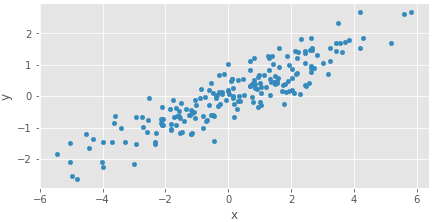

In [3]:
# 適当な二次元データ
np.random.seed(0)
mean = np.array([0, 0])
cov = np.array([[5,2],[2,1]])
N = 200
X = pd.DataFrame(sp.random.multivariate_normal(mean, cov, N), columns=['x', 'y'])
X.plot(kind='scatter', x='x', y='y').set_aspect('equal')
savefig("1.png")

平均と分散共分散行列をサンプリングする関数。

In [4]:
def sample_mean(X, cov):
    return np.random.multivariate_normal(X.mean(axis=0), cov / X.shape[0])

In [5]:
def residual2(x, mean):
    d = (x-mean).reshape(x.shape[0], 1)
    return np.dot(d, d.T)

def sample_cov(X, mean):
    N, p = X.shape
    psi = np.add.reduce([residual2(x, mean) for x in X])
    nu = N - p - 1
    return sp.stats.invwishart.rvs(nu, psi)

MCMCを回す関数。

In [6]:
def sampling(X, iters, init):
    mean = init['mean']
    cov = init['cov']
    p = mean.shape[0]
    iu = np.triu_indices_from(cov)
    trace= np.zeros((iters, p + len(iu[0])))
    
    for i in range(iters):
        mean = sample_mean(X.as_matrix(), cov)
        cov = sample_cov(X.as_matrix(), mean)
        trace[i, 0:2] = mean
        trace[i, 2:len(iu)+3] = cov[iu]

    columns = np.r_[
        X.columns.values,
        ["{0}-{1}".format(X.columns.values[iu[0][x]], X.columns.values[iu[1][x]]) for x in range(len(iu[0]))]
    ]
    trace = pd.DataFrame(trace, columns=columns)
    return trace

初期値を吐く関数。

In [7]:
def init():
    ret = {
        'mean': np.random.uniform(-100, 100, 2),
        'cov': np.array([np.random.uniform(0, 100),
                          np.random.uniform(-100, 100),
                          np.random.uniform(-100, 100),
                          np.random.uniform(0, 100)]).reshape(2,2)
    }
    ret['cov'][1,0] = ret['cov'][0,1]
    return ret

実行。イテレーションの半分をバーンアウトで除外するとして、サンプリング数が2000もあれば十分だと色々な所で書かれているように思う。

In [8]:
iters = 4000
trace = sampling(X, iters, init())
trace_bt = trace[int(iters/2):]

サンプリング結果の統計量。よさそう。

In [9]:
trace_bt.describe().T

,count,mean,std,min,25%,50%,75%,max
x,2000.0,0.163520,0.160296,-0.332585,0.057800,0.161832,0.269458,0.862993
y,2000.0,0.074946,0.072700,-0.195283,0.025820,0.075024,0.122358,0.369140
x-x,2000.0,5.088453,0.517373,3.624903,4.721854,5.049070,5.417908,6.819342
x-y,2000.0,2.082198,0.223521,1.394641,1.923303,2.066437,2.228016,2.901780
y-y,2000.0,1.051050,0.107411,0.736260,0.979559,1.041264,1.120481,1.543131


$ \boldsymbol\mu $ と $\boldsymbol\Sigma $ のトレースプロットとヒストグラム。トレースプロットは安定している。


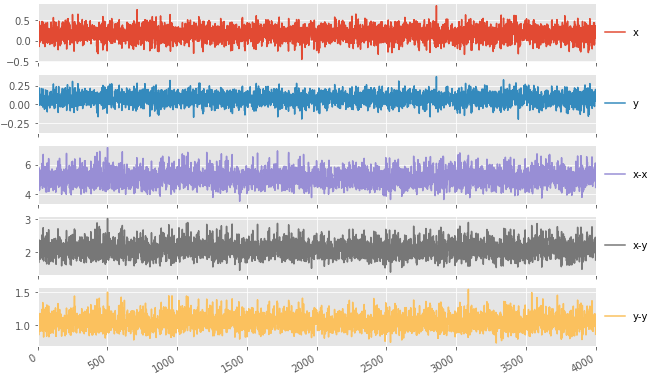


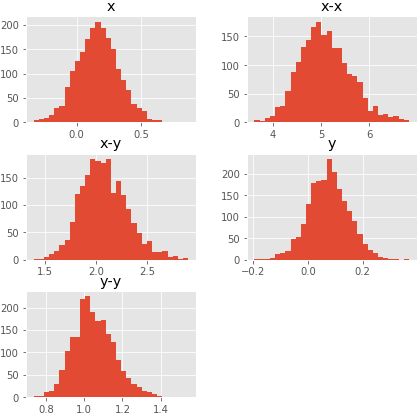

In [10]:
ps = trace.plot(layout=(5,1), subplots=True, figsize=(10,7))
[p[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) for p in ps]
savefig("2.png")
trace_bt.hist(bins=30, figsize=(7,7))
savefig("3.png")

このようにギブスサンプリングで推定できる。

厳密にはMCMCサンプリングの収束性/安定性/信頼性的なものを評価しなければならないのだが、よく知らないので今回は行わない。

## 2成分の混合モデルのパラメータ推定

例えば下のようなデータについて、2成分混合モデルのパラメータ推定を行いたい。

In [11]:
np.random.seed(0)
mean0 = np.array([0, 0])
cov0 = np.array([[5,2],[2,1]])
mean1 = np.array([5, 7])
cov1 = np.array([[8,-2],[-2,7]])
N = 200
a = 0.7
X = pd.DataFrame(
    np.r_[
        sp.random.multivariate_normal(mean0, cov0, int(N*(1-a))),
        sp.random.multivariate_normal(mean1, cov1, int(N*a))
    ],
    columns=['x', 'y']
)

In [12]:
# 2変量正規分布の95%区間を作図する関数
def add_ellipse_CI95(p, mean, cov, **kwargs):
    # http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
    w, v = np.linalg.eig(cov)
    v1 = v[:, np.argmax(w)]
    angle = 180. / np.pi * np.arctan(v1[1]/v1[0])
    width = 2 * np.sqrt(np.max(w) * 5.991)
    height = 2 * np.sqrt(np.min(w) * 5.991)
    e = matplotlib.patches.Ellipse(mean, width, height, angle=angle, **kwargs)
    p.add_artist(e)


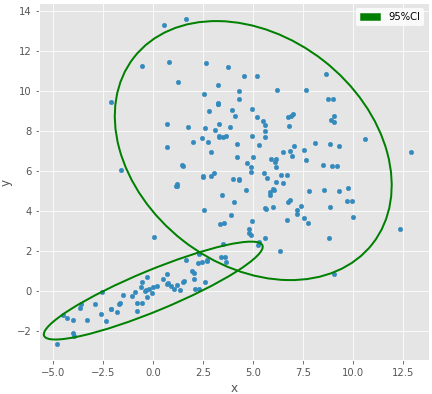

In [13]:
p = X.plot(kind='scatter', x='x', y='y', figsize=(7,7))
p.set_aspect('equal')
add_ellipse_CI95(p, mean0, cov0, fc='none', ls='solid', ec='g', lw='2.')
add_ellipse_CI95(p, mean1, cov1, fc='none', ls='solid', ec='g', lw='2.')

g = matplotlib.patches.Patch(color='g', label='95%CI')
p.legend(handles=[g])
savefig("4.png")

混合比aと各データの属するクラスタのインデックスzをサンプリングする関数。これは以前書いた。

In [14]:
def sample_a(n1, N):
    alpha = n1 + 1
    beta = N - alpha + 2
    return np.random.beta(alpha, beta)

In [15]:
def sample_z(X, mean0, cov0, mean1, cov1):
    mvn0 = sp.stats.multivariate_normal(mean0, cov0)
    mvn1 = sp.stats.multivariate_normal(mean1, cov1)
    z = np.zeros(len(X))

    for i in range(len(X)):
        d0 = a * mvn0.pdf(X[i])
        d1 = (1-a) * mvn1.pdf(X[i])
        z[i] = 0 if np.random.uniform() * (d0+d1) < d0 else 1

    return z

実際にMCMCを回す関数。

In [16]:
def sampling(X, iters, init):
    mean0 = init['mean0']
    cov0 = init['cov0']
    mean1 = init['mean1']
    cov1 = init['cov1']
    a = init['a']
    z = init['z']

    N = len(X)
    p = mean0.shape[0]
    iu = np.triu_indices_from(cov0)
    trace = np.zeros((iters, p*(p+3)+1))
    indices = [
        range(0,p),
        range(p,p*2),
        range(p*2, p*2+len(iu[0])),
        range(p*2+len(iu[0]),p*2+len(iu[0])*2),
        -1
    ]
    
    trace_z = np.zeros((iters, N))
    
    for i in range(iters):
        mean0 = sample_mean(X[z==0].as_matrix(), cov0)
        cov0 = sample_cov(X[z==0].as_matrix(), mean0)

        mean1 = sample_mean(X[z==1].as_matrix(), cov1)
        cov1 = sample_cov(X[z==1].as_matrix(), mean1)
        
        z = sample_z(X.as_matrix(), mean0, cov0, mean1, cov1)
        a = sample_a(np.sum(z), N)
        
        trace[i, indices[0]] = mean0
        trace[i, indices[1]] = mean1
        trace[i, indices[2]] = cov0[iu]
        trace[i, indices[3]] = cov1[iu]
        trace[i, indices[4]] = a
        trace_z[i, :] = z

    mls = X.columns.values
    cls = ["{0}-{1}".format(mls[iu[0][x]], mls[iu[1][x]]) for x in range(len(iu[0]))]
    columns = np.r_[
        'mean0_' + X.columns.values,
        'mean1_' + X.columns.values,
        ['cov0_' + x for x in cls],
        ['cov1_' + x for x in cls],
        ['a']
    ]
    trace = pd.DataFrame(trace, columns=columns)
    trace_z = pd.DataFrame(trace_z)
    return trace, trace_z

ランダムに初期値を吐く関数。

In [17]:
def init():
    ret = {
        'mean0': np.random.uniform(-100, 100, 2),
        'cov0': np.array(
            [np.random.uniform(0, 100),
             np.random.uniform(-100, 100),
             np.random.uniform(-100, 100),
             np.random.uniform(0, 100)])
        .reshape(2,2),
        'mean1': np.random.uniform(-100, 100, 2),
        'cov1': np.array(
            [np.random.uniform(0, 100),
             np.random.uniform(-100, 100),
             np.random.uniform(-100, 100),
             np.random.uniform(0, 100)])
        .reshape(2,2),
        'a':np.random.uniform(0,1),
        'z':np.random.choice([0,1],N)
    }
    ret['cov0'][1,0] = ret['cov0'][0,1]
    ret['cov1'][1,0] = ret['cov1'][0,1]
    return ret

サンプリングの実施。

In [18]:
iters=4000
trace, trace_z = sampling(X, iters, init())
trace_bt = trace[int(iters/2):]
trace_z_bt = trace_z[int(iters/2):]

統計量とかトレースプロットとか。大体よさそうですね。

In [19]:
trace_bt.describe().T

,count,mean,std,min,25%,50%,75%,max
mean0_x,2000.0,5.217417,0.246319,4.434947,5.049565,5.214964,5.377112,6.039323
mean0_y,2000.0,6.720549,0.224982,6.025233,6.566071,6.721028,6.876198,7.528824
mean1_x,2000.0,0.091062,0.415640,-1.035989,-0.189953,0.078688,0.357026,1.935522
mean1_y,2000.0,0.145043,0.195718,-0.409237,0.010384,0.136426,0.262071,1.094639
cov0_x-x,2000.0,8.148586,1.028427,5.343484,7.423401,8.084348,8.785698,12.613252
cov0_x-y,2000.0,-1.873856,0.664362,-4.863892,-2.318509,-1.837150,-1.431372,0.354401
cov0_y-y,2000.0,6.207559,0.805567,3.842488,5.648120,6.124835,6.689534,10.317304
cov1_x-x,2000.0,7.832943,1.992874,3.702180,6.423858,7.516245,9.004336,20.149544
cov1_x-y,2000.0,3.365580,0.934433,1.317172,2.711399,3.211826,3.888139,9.118193
cov1_y-y,2000.0,1.684231,0.460833,0.670632,1.362082,1.612215,1.941712,4.622195



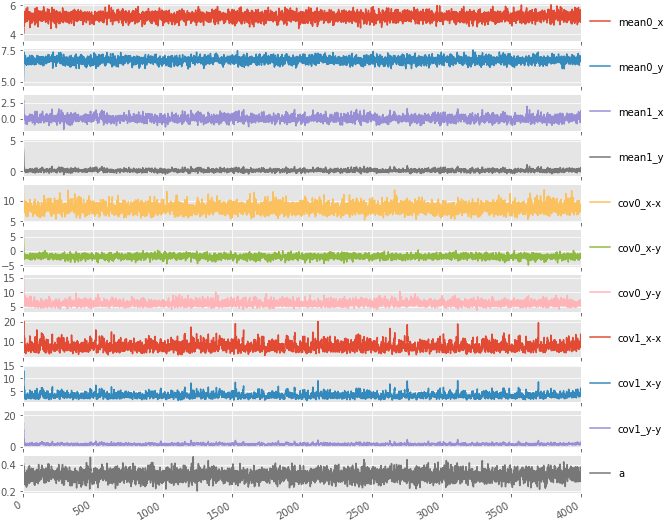


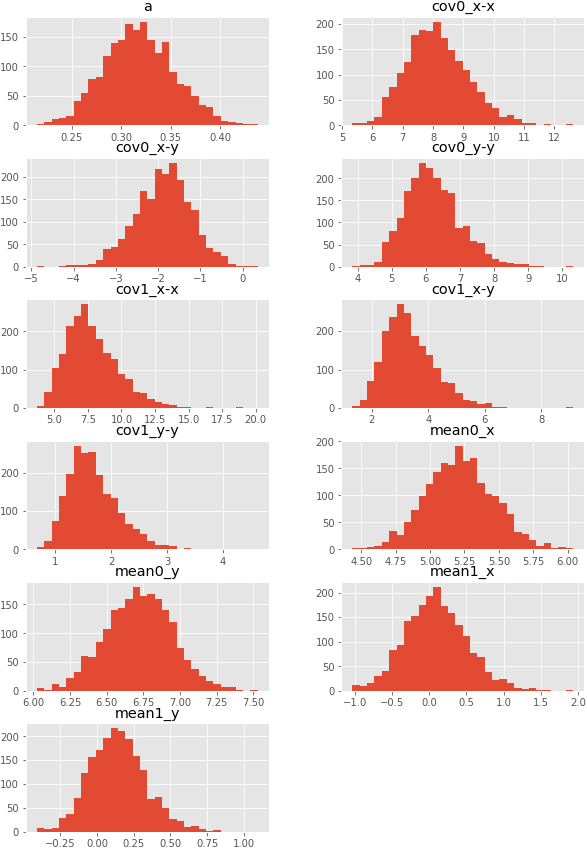

In [20]:
ps = trace.plot(layout=(11,1), subplots=True, figsize=(10,10))
[p[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) for p in ps]
savefig("5.png")
trace_bt.hist(bins=30, layout=(6, 2), figsize=(10,15))
savefig("6.png")

推定された分布とzを可視化し、データ生成時の分布と比較する。zは点ごとに最頻値を用いた。

In [21]:
def plot_result(df, params, plottrue=False, cilegend=False, iteration=None):
    clusters = df.groupby('cluster')
    for i, c in clusters:
        if i == 0:
            p = c.plot(kind='scatter', x='x', y='y', label='C.'+str(i), color=colors[int(i%8)], figsize=(7,7))
        else:
            c.plot(kind='scatter', x='x', y='y', label='C.'+str(i), color=colors[int(i%8)], ax=p)
    p.set_aspect('equal')

    mean0e = np.array(params[0:2])
    cov0e = np.array([params[4:6],params[5:7]])
    mean1e = np.array(params[2:4])
    cov1e = np.array([params[7:9],params[8:10]])

    if plottrue:
        add_ellipse_CI95(p, mean0, cov0, fc='none', ls='solid', ec='b', lw='2.', alpha=0.5)
        add_ellipse_CI95(p, mean1, cov1, fc='none', ls='solid', ec='b', lw='2.', alpha=0.5)
        ec0 = 'y'
        ec1 = 'y'
    else:
        ec0 = colors[0]
        ec1 = colors[1]
    add_ellipse_CI95(p, mean0e, cov0e, fc='none', ls='solid', ec=ec0, lw='2.', alpha=0.5)
    add_ellipse_CI95(p, mean1e, cov1e, fc='none', ls='solid', ec=ec1, lw='2.', alpha=0.5)

    if cilegend:
        handles, labels = p.get_legend_handles_labels()
        b = matplotlib.patches.Patch(color='b')
        y = matplotlib.patches.Patch(color='y')
        _ = p.legend(handles+[b, y], labels+['95%CI', 'Estimated 95%CI'], ncol=2, loc='lower right')
    p.set_xlim(-8, 15)
    p.set_ylim(-5, 15)
    p.set_xticks(range(-8, 15, 2))
    p.set_yticks(range(-4, 15, 2))
    
    if iteration is not None: p.text(-7.5, 14, 'iteration:{:5d}'.format(iteration), fontsize='x-large')
    return p


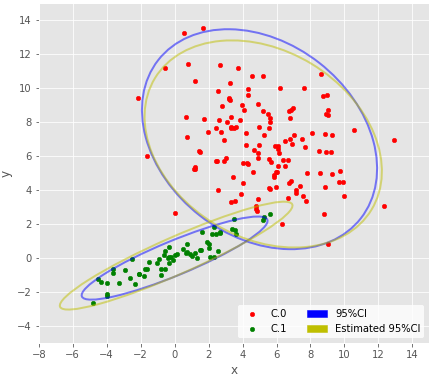

In [22]:
z = trace_z_bt.apply(lambda x:np.bincount(x.as_matrix().astype(int)).argmax(), axis=0)
df = X.copy(deep=True)
df['cluster']=pd.Series(z.astype(int))
plot_result(df, trace_bt.mean(), plottrue=True, cilegend=True)
savefig("7.png")

おおむねそれらしいような気はする。

95%CIのアニメーションも描いてみた。上手く推定できているように見える。こんなんで上手く推定できるのが不思議。

In [23]:
def makegif(gif, pngfunc):
    with tempfile.TemporaryDirectory(dir=".") as d:
        pngfunc(d)
        c = "convert -layers optimize -delay 65 -loop 0 {}/0*.png -delay 400 {}/last.png {}".format(d, d, gif)
        subprocess.call(c.split(" "))


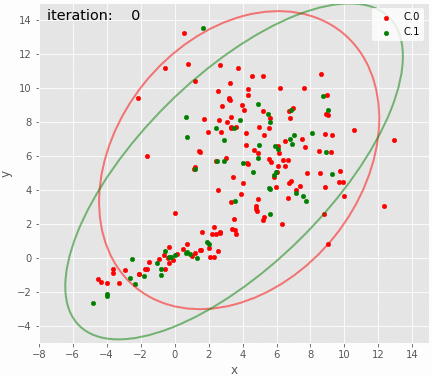

In [24]:
gif = "8.gif"
def pngfunc(d):
    iterations = [i for j in (range(0, 20), [100, 500, 1000, 2000, 3000, iters-1]) for i in j]
    for i in iterations:
        df['cluster']=pd.Series(trace_z.loc[i].astype(int))
        plot_result(df, trace.loc[i], iteration=i)
        png = d + "/last.png" if i == iters-1 else d + "/{:06d}.png".format(i)
        plt.savefig(png, bbox_inches='tight', pad_inches=0)
        plt.close()

makegif(gif, pngfunc)
        
with open(gif, "rb") as f:
    display(HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(f.read()).decode('utf8'))))

## 3以上の混合分布の推定

混合数が3以上と思われるデータを推定したい。例えば下。混合数=4。人が目で見れば簡単に分かる。


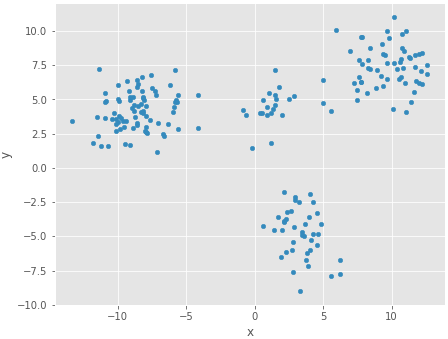

In [25]:
# 適当な二次元データ
def mean():
    return np.random.uniform(-10,10,2)

def cov():
    cov = np.random.uniform(-4,4,4)
    cov[0] = np.abs(cov[0])
    cov[1] = np.abs(cov[1])
    cov[2] = cov[1]
    
    return cov.reshape((2,2))

np.random.seed(0)
N = 200
pi = [0.1, 0.2, 0.3, 0.4]
X = pd.DataFrame(
    np.r_[
        sp.random.multivariate_normal(mean(), cov(), int(N*pi[0])),
        sp.random.multivariate_normal(mean(), cov(), int(N*pi[1])),
        sp.random.multivariate_normal(mean(), cov(), int(N*pi[2])),
        sp.random.multivariate_normal(mean(), cov(), int(N*pi[3]))
    ],
    columns=['x', 'y'])

X.plot(kind='scatter', x='x', y='y').set_aspect('equal')
savefig("9.png")

混合数が2の場合は混合比をaと(1-a)と表現したが、3以上の場合は各分布の混合比$ \pi_{1:K}, \Sigma_{i=1}^K \pi_{i} = 1 $とすると扱いやすい。Kは混合数。下の$ n_{1:K} $は各分布に属するデータ点数。

$$
P(\pi_{1:k} \mid \boldsymbol{z}) \propto \prod_{i=1}^K \pi_i^{n_i}
$$

これは規格化すると[ディリクレ分布](https://en.wikipedia.org/wiki/Dirichlet_distribution)の確率密度関数となる。

$$
P(\boldsymbol{x} \mid \boldsymbol\alpha) = \frac {1} {B(\boldsymbol\alpha)} \prod_{i=1}^K x_i^{\alpha_i-1} \\
\alpha_i=n_i+1
$$

$ \pi $ をサンプリングする関数。

In [26]:
def sample_pi(z, K):
    return np.random.dirichlet(np.bincount(z, minlength=K) + 1)

混合比を可変としたので、各点の属するクラスタのインデックスzのサンプリングも修正。

In [27]:
def sample_z(X, pi, mean, cov, K):
    mvn = [sp.stats.multivariate_normal(mean[i], cov[i]) for i in range(K)]
    z = np.zeros(len(X))
    
    for i in range(len(X)):
        p = [pi[k] * mvn[k].pdf(X[i]) for k in range(K)]
        z[i] = np.random.choice(range(K), p=p/np.sum(p))
    return z.astype(int)

MCMC回す関数。

19行目のif文がどうやら重要で、データが少ないクラスタに対して、そのクラスタのパラメータをリセットし、別のクラスタを2分割している。これをしないと、データ点数が少ないクラスタはcovが発散してしまい、そうなるとデータ点数はさらに下がり、最終的にcovの条件付き確率が計算できなくなり落ちる。

In [28]:
def sampling(X, iters, init):
    mean = init['mean']
    cov = init['cov']
    pi = init['pi']
    z = init['z']

    N = len(X)
    K = len(mean)
    p = mean[0].shape[0]

    iu = np.triu_indices_from(cov[0])
    trace = np.zeros((iters, int(p*(p+3)/2*K)))
    trace_pi = np.zeros((iters, K))
    trace_z = np.zeros((iters, N))

    for i in range(iters):
        for k in range(K):
            # データが少ないクラスタはパラメタをリセットし、ランダムに別のクラスタを選択・分割する
            if(len(X[z==k])-p-1<p):
                parent = np.random.choice(range(N))
                mean[k] = mean[z[parent]]
                cov[k] = cov[z[parent]]
                pi[k] = (pi[k] + pi[z[parent]])/2
                pi[z[parent]] = pi[k]
            else:
                mean[k] = sample_mean(X[z==k].as_matrix(), cov[k])
                cov[k] = sample_cov(X[z==k].as_matrix(), mean[k])
        
        z = sample_z(X.as_matrix(), pi, mean, cov, K)
        pi = sample_pi(z, K)
        
        trace[i, :] = np.concatenate(mean + [x[iu] for x in cov])
        trace_z[i, :] = z
        trace_pi[i, :] = pi

    mls = X.columns.values
    cls = ["{0}-{1}".format(mls[iu[0][x]], mls[iu[1][x]]) for x in range(len(iu[0]))]
    columns = np.r_[
        np.concatenate(['mean' + str(k) + '_' + mls for k in range(K)]),
        np.concatenate([['cov{}_{}'.format(k, x) for x in cls] for k in range(K)])
    ]
    trace = pd.DataFrame(trace, columns=columns)
    trace_pi = pd.DataFrame(trace_pi)
    trace_z = pd.DataFrame(trace_z)
    return trace, trace_pi, trace_z

In [29]:
def init(X, K):
    ret = {
        'mean': [np.random.uniform(-100, 100, 2) for k in range(K)],
        'cov': [np.random.uniform(-100, 100, 4).reshape(2,2) for k in range(K)],
        'pi':np.random.uniform(0,1, K),
        'z':np.random.choice(range(K),X.shape[0]).astype(int)
    }
    for k in range(K):
        ret['cov'][k][0,1] = np.abs(ret['cov'][k][0,1])
        ret['cov'][k][1,0] = ret['cov'][k][0,1]
    ret['pi'] = ret['pi']/sum(ret['pi'])
    return ret

実行。

In [30]:
iters = 4000
K=4
trace, trace_pi, trace_z = sampling(X, iters, init(X, K))
trace_bt = trace[int(iters/2):]
trace_pi_bt = trace_pi[int(iters/2):]
trace_z_bt = trace_z[int(iters/2):]

クラスタの混合比 $ \pi $のトレースプロット。クラスタ3はところどころ混合比が跳ね上がっており、あまり良くない。


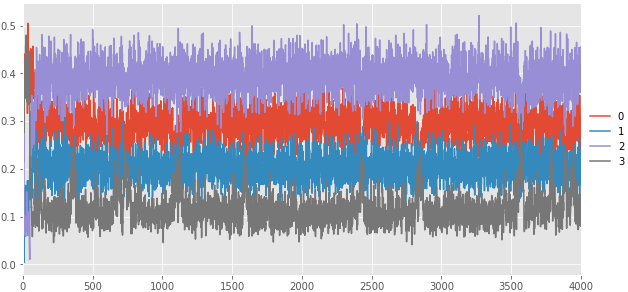

In [31]:
p = trace_pi.plot(figsize=(10,5))
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
savefig("10.png")

各クラスタのパラメータのトレースプロット（上：全期間、下：バーンインを除外）。序盤で分散共分散が発散している分布がある。バーンアウト以降もクラスタ3のX方向の分散にスパイクが見られる。

クラスタ3以外は綺麗。


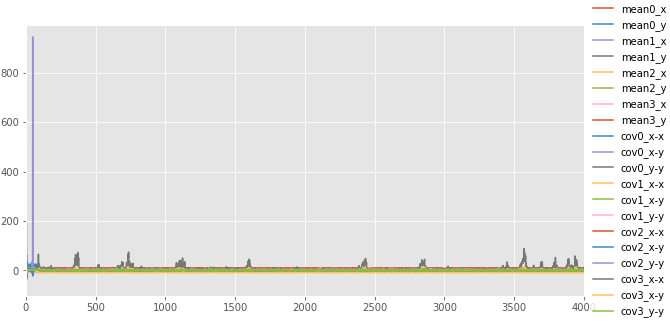


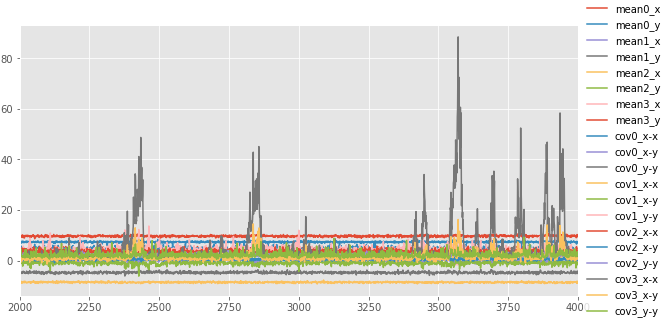

In [32]:
p = trace.plot(figsize=(10,5))
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
savefig("11.png")
p = trace_bt.plot(figsize=(10,5))
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
savefig("12.png")

サンプリングの履歴を可視化。
iteration:30付近でクラスタ2のパラメータがリセットされている。
それ以降は良さそうに推定できている。
パラメータのトレースプロットで示されたとおり、クラスタ3の分布がたまにX方向に広がる。

In [33]:
def plot_result(df, params, K, iteration=None):
    clusters = df.groupby('cluster')
    for ii, ic in enumerate(clusters):
        i, c = ic
        color = colors[int(i%len(colors))]
        if ii == 0:
            p = c.plot(kind='scatter', x='x', y='y', label='C.'+str(i), color=color, figsize=(7,7))
        else:
            c.plot(kind='scatter', x='x', y='y', label='C.'+str(i), color=color, ax=p)

    p.set_aspect('equal')
    p.set_xlim(-13, 13)
    p.set_ylim(-10, 13)
    p.set_xticks(range(-12, 14, 2))
    p.set_yticks(range(-10, 14, 2))

    if iteration is not None:
        p.text(-8, 11.5, 'iteration:{:5d}'.format(iteration), fontsize='x-large')

    for i in range(K):
        mean = np.array(params[i*2:i*2+2])
        cov = np.array([params[K*2+i*3:K*2+2+i*3],params[K*2+1+i*3:K*2+3+i*3]])
        add_ellipse_CI95(p, mean, cov, fc='none', ls='solid', ec=colors[i], lw='2.', alpha=0.5)
   
    return p


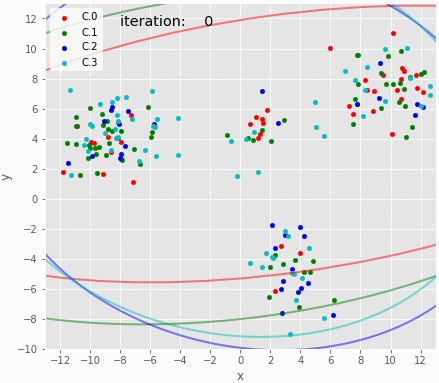

In [34]:
gif = "13.gif"
def pngfunc(d):
    for i in chain(range(30), [50], range(100, 500, 100), range(500, 4000, 250), [iters-1]):
        z=trace_z.loc[i]
        df = X.copy(deep=True)
        df['cluster']=pd.Series(z.astype(int))
        plot_result(df, trace.loc[i], 4, iteration=i)
        png = d + '/last.png' if i == iters-1 else d + "/{:06d}.png".format(i)
        plt.savefig(png, bbox_inches='tight', pad_inches=0)
        plt.close()

makegif(gif, pngfunc)

with open(gif, "rb") as f:
    display(HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(f.read()).decode('utf8'))))

バーンイン以降のサンプリング結果のMAP推定値を可視化。これだけみるとよさそうに見える。代表値としてMAP推定値ではなく平均を使うとクラスタ3の95%信頼区間が横に伸びる。また、クラスタ3の95%区間はestmapのbins次第でも大きく変化する。

In [35]:
def estmap(samples, bins=100):
    hist = np.histogram(samples, bins)
    return hist[1][np.argmax(hist[0])]


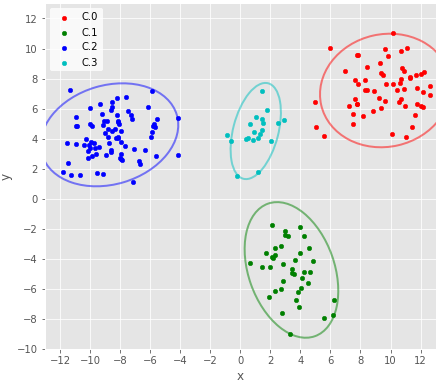

In [36]:
z = trace_z_bt.apply(lambda x:np.bincount(x.as_matrix().astype(int)).argmax(), axis=0)
df = X.copy(deep=True)
df['cluster']=pd.Series(z.astype(int))
plot_result(df, trace_bt.apply(estmap, axis=0), 4)
savefig("14.png")

クラスタ3の分散共分散の事後分布が変な形になったようだが、それ以外は概ねよく推定できた。

試しに同じデータについて、混合数を5として推定した。

In [37]:
K = 5
iters = 1000
trace, trace_pi, trace_z = sampling(X, iters, init(X, K))
trace_bt = trace[int(iters/2):]
trace_pi_bt = trace_pi[int(iters/2):]
trace_z_bt = trace_z[int(iters/2):]

混合比$ \pi $のトレースプロット。まるで収束していない。


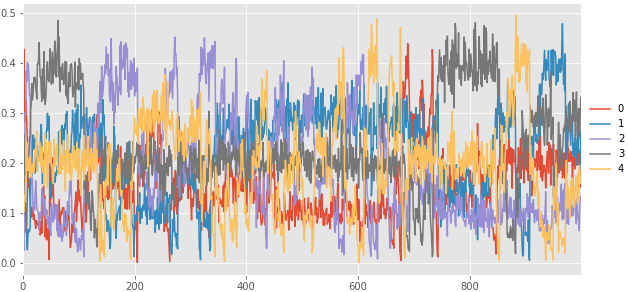

In [38]:
p = trace_pi.plot(figsize=(10,5))
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
savefig("15.png")

サンプリングのアニメーション。試行錯誤していることは伝わる。


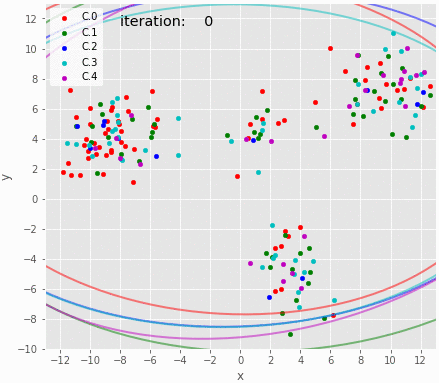

In [39]:
gif = "16.gif"
def pngfunc(d):
    for i in chain(range(30), [50], range(100, 1000, 100), [iters-1]):
        z=trace_z.loc[i]
        df = X.copy(deep=True)
        df['cluster']=pd.Series(z.astype(int))
        plot_result(df, trace.loc[i], K, iteration=i)
        png = d + '/last.png' if i == iters-1 else d + "/{:06d}.png".format(i)
        plt.savefig(png, bbox_inches='tight', pad_inches=0)
        plt.close()

makegif(gif, pngfunc)

with open(gif, "rb") as f:
    display(HTML('<img src="data:image/png;base64,{}">'.format(base64.b64encode(f.read()).decode('utf8'))))

上のように、混合比やパラメタの収束具合を見ることで混合数が適切かどうかを判断することができるようだ。ただし面倒くさいとも思う。

その他わかったこと。

1. `site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.`が沢山でる。よくないのかもしれない。
2. seabornはimportするだけでプロットの見た目が変化するのでキモい。
3. matplotlibは難しい。
4. jupyter notebookが便利。
5. Rのggplot2とdplyrとtidyrはすごい便利。

おわり。